In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

## Ocr every letter

Getting boxes around text by using `pytesseract.image_to_boxes`

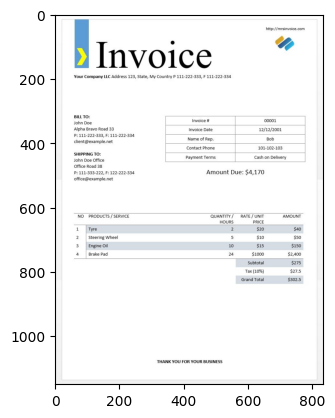

In [17]:
img = cv2.imread("images/invoice-sample.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [18]:
img.shape

(1150, 835, 3)

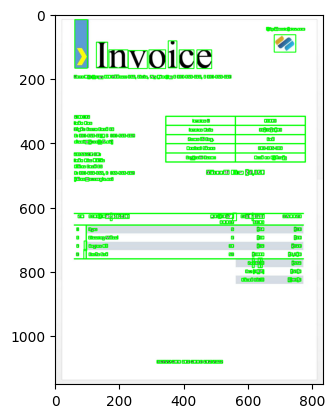

In [19]:
img = cv2.imread("images/invoice-sample.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

h,w,c = img.shape

# Get bounding box
boxes = pytesseract.image_to_boxes(img)
# print(f"Boxes: {boxes}")
for b in boxes.splitlines():
    b = b.split(' ')
    # print(b)
    img = cv2.rectangle(img, (int(b[1]),h-int(b[2])), 
                        (int(b[3]), h-int(b[4])), (0,255,0),2)
    
plt.imshow(img)    